In [1]:
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def loadData(path):
    contents=np.array(read_csv(path))
    x=contents[:,0:-1]
    y=contents[:,-1]
    return x,y

# 是否进行均值归一化? 是否将x增添两维
def data_x_process(x,normalization=False,multiX=True):
    # 记得对x进行均值归一化
    if normalization:
        x_mean=np.mean(x,axis=0)
        x_max=np.max(x,axis=0)
        x_min=np.min(x,axis=0)
        x=(x-x_mean)/(x_max-x_min)
    if multiX:
        # 由于这里的形状类似于一个圆形/椭圆形,因此我们得假设函数hyposis也应该设置为类似于圆得形状
        var_n=x.shape[1]-1 # 不算常数项
        tmp_x=np.zeros([x.shape[0],var_n])
        for i in range(var_n):
            tmp_x[:,i]=x[:,i+1]**2
        x=np.column_stack([x,np.array(tmp_x)])
    return x

def showPlot(data,y,limit):
    pos=data[y>=limit]
    neg=data[y<limit]
    plt.scatter(pos[:,0],pos[:,1])
    plt.scatter(neg[:,0],neg[:,1])

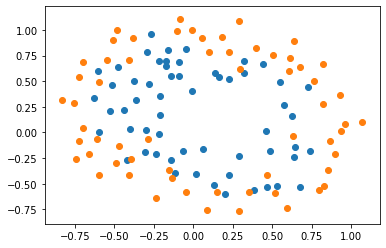

In [3]:
x,t=loadData('ex2data2.txt')
showPlot(x,t,1)

In [4]:
# 我们期望得theta应该是一个五维向量
def h(x,theta):
    return np.dot(x,theta)

# sigmoid加持下的h
def predict(x,theta):
    return 1/(1+np.exp(-h(x,theta)))

In [5]:
def Cost(x,theta,t):
    t1=1-t
    y_hat=predict(x,theta)
    x1=np.log(y_hat)
    x2=np.log(1-y_hat)
    
    batch_size=t.shape[0]
    return -(np.dot(t,x1)+np.dot(t1,x2))/batch_size

def dCost(x,theta,t):
    batch_size=t.shape[0]
    y_hat=predict(x,theta)
    diff=y_hat-t
    return np.dot(diff,x)/batch_size

def gradient(x,theta,t,alpha=0.01,maxIters=1000,delta=1e-5):
    hist_cost=[]
    for i in range(maxIters):
        theta=theta-alpha*dCost(x,theta,t)
        
        cost=Cost(x,theta,t)
        hist_cost.append(cost)
        
        if i%100==50:
            if abs(hist_cost[-1]-hist_cost[-2])<delta:
                break
    
    return theta,np.array(hist_cost),i+1

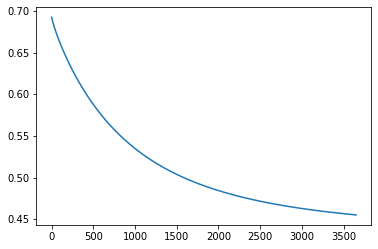

In [18]:
ones=np.zeros_like(t)+1
x_with_1=np.column_stack([ones,x])
x_input=data_x_process(x_with_1)
init_theta=np.zeros(5)

iters=10000
alpha=0.1
delta=1e-8
final_theta,costs,iters=gradient(x_input,init_theta,t,maxIters=iters,alpha=alpha)

plt.plot(np.arange(iters),costs)

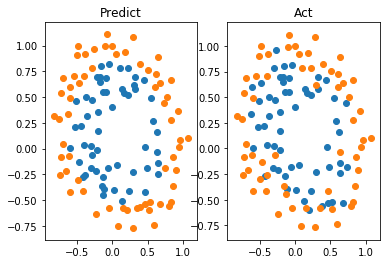

In [20]:
y_predict=predict(x_input,final_theta)
plt.subplot(1,2,1)
plt.title("Predict")
showPlot(x,y_predict,limit=0.5)

plt.subplot(1,2,2)
plt.title("Act")
showPlot(x,t,1)

In [ ]:
# 分界线怎么搞??
# 他们的分界线的位置是thetaX=0,也就是predict=1的位置,那么给定一个x0,求对应的x1使得thetaX=0
